#### Advanced Statistics for Data Science (Spring 2022)
# Home Assignment 4
#### Topics:
- Multiple Comparison
- Simple Regression
- Multiple Regression

#### Due: 06/06/2023 by 18:30 
(Note: no class on this day!)

#### Instructions:
- Write your name, Student ID, and date in the cell below. 
- Submit a copy of this notebook with code filled in the relevant places as the solution of coding exercises.
- For theoretic exercises, you can either write your solution in the notebook using $\LaTeX$ or submit additional notes.

<hr>
<hr>


Name: Loten Noy, Gil-ad Katz Student ID: 201466349, 313591851

**Date**: 27/05/2023

$
\newcommand{\Id}{{\mathbf{I}}}  
\newcommand{\SSE}{\mathsf{SSE}}
\newcommand{\SSR}{\mathsf{SSR}}
\newcommand{\MSE}{\mathsf{MSE}}
\newcommand{\simiid}{\overset{iid}{\sim}}
\newcommand{\ex}{\mathbb E}
\newcommand{\var}{\mathrm{Var}}
\newcommand{\Cov}[2]{{\mathrm{Cov}  \left(#1, #2 \right)}}
\newcommand{\one}[1]{\mathbf 1 {\left\{#1\right\}}}
\newcommand{\SE}[1]{\mathrm{SE} \left[#1\right]}
\newcommand{\reals}{\mathbb R}
\newcommand{\Ncal}{\mathcal N}
\newcommand{\abs}[1]{\ensuremath{\left\vert#1\right\vert}}
\newcommand{\rank}{\operatorname{rank}}
\newcommand{\tr}{\operatorname{Tr}}
\newcommand{\diag}{\operatorname{diag}}
\newcommand{\sign}{\operatorname{sign}}
$


<hr>
<hr>

## Problem 1 (Exact size of Bonferroni's test)
Suppose that we run multiple tests with independent data and obtain P-values $p_1,\ldots,p_n$. We wish to test the null hypothesis:
$$
H_0\,:\,\text{All tests are null}
$$
at the level $\alpha$ (e.g., $\alpha=0.05$). In class, we introduced Bonferroni's procedure which is equivalent to: Reject $H_0$ if $\min p_i \leq \alpha/n$. 
1. Show that the  size of the test in Bonferroni's procedure is at most $\alpha$, regardless if the hypotheses are independent or not. 
2. Assuming that the hypotheses are independent, find the exact size of the test in Bonferroni's procedure. 
3. For $\alpha=0.05$, evaluate the difference between $\alpha$ and the exact test's size for $n=2,...,50$. Discuss what you see.



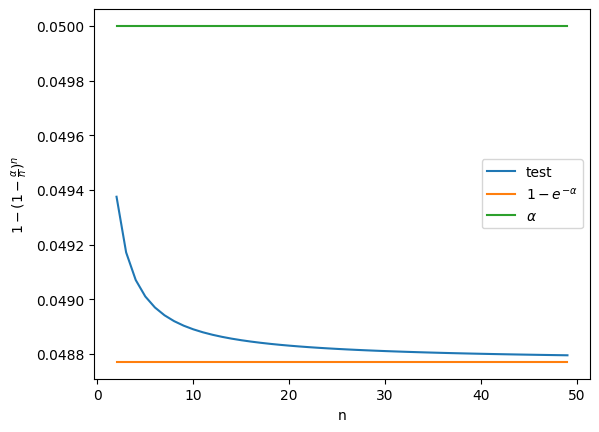

In [20]:
import matplotlib.pyplot as plt
import numpy as np

alpha = 0.05

test = []
for n in range(2, 50):
    test.append(1 - (1 - alpha/n)**n)

limit = 1-np.exp(-alpha)

plt.plot(range(2, 50), test, label='test')
plt.plot(range(2, 50), [limit]*48, label='$1-e^{-\\alpha}$')  
plt.plot(range(2, 50), [alpha]*48, label='$\\alpha$')  
plt.xlabel('n')
plt.ylabel('$1 - (1 - \\frac{\\alpha}{n})^n$')
plt.legend()
plt.show()

As n increases, the exact test's size approaches the desired significance level α = 0.05 but never reaches it exactly.
* The difference between α and the exact test's size decreases as n increases.

## Problem 2 (Prediction in Simple Regression)
Consider the linear model:
$$
    y_i = \beta_0 + \beta_1 x_i + \epsilon_i,\qquad \epsilon_i \simiid \Ncal(0,\sigma^2)
$$
$$
    Z = \begin{pmatrix}
    1 & x_1 \\
    \vdots & \vdots \\
    1 & x_n
    \end{pmatrix},\quad \beta=\begin{pmatrix}
    \beta_0 \\
    \beta_1
    \end{pmatrix},\qquad \hat{\beta}=(Z^\top Z)^{-1} Z^\top y
$$
Suppose we get a new data point $x_{n+1}$ and want to predict $y_{n+1}$. We want an interval in which this prediction will likely to land. In class, we used that 
$$
\var[\hat{\beta}_0 + \hat{\beta}_1 x] = \sigma^2 \left( \frac{1}{n} + \frac{(x-\bar{x})^2}{S_{XX }}\right)
$$
to obtain a confidence interval for $\beta_0 + \beta_1 x$, and a confidence band for all $x \in \reals$. In this question, you will use a similar reasoning to get a confidence interval (and bands) for $y_{n+1}$.
1. Find the variance of $y_{n+1} - (\hat{\beta}_0 + \hat{\beta}_1 x_{n+1})$ in terms of $\sigma^2$ and $x_1,\ldots,x_n$ and $x_{n+1}$ (you can use $\bar{x}$ and $S_{XX}$ or any other well-defined function of $x_1,\ldots,x_n$). Explain intuitively why it makes sense that this variance is larger than the variance of  $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$.
2. Find a $1-\alpha$ confidence interval for $y_{n+1}$. Is this interval wider or narrower than that of $\hat{\beta}_0 + \hat{\beta}_1 x_{n+1}$? For what value of $x_{n+1}$ this interval is the narrowest?
3. Suppose that we take the average of two responses $y$'s at the same $x_{n+1}$, say 
$$
y_{n+1} =  \frac{y_{n+1}^{(1)} + y_{n+1}^{(2)}}{2}, 
$$
where
$$
y_{n+1}^{(1)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(1)}
$$
and 
$$
y_{n+1}^{(2)} = \beta_0 + \beta_1 x_{n+1} + \epsilon_{n+1}^{(2)},
$$
where $\epsilon_{n+1}^{(1)}$ and $\epsilon_{n+1}^{(2)}$ are independent. Find a confidence interval for $y_{n+1}$. Is it wider or narrower than the interval in (2) ?

Note: The confidence interval you derived in 2 is somewhat risky to use because it makes the strong assumption that $\epsilon_{n+1}$ is normal. This is compared to, say, confidence intervals for $\hat{\beta}_0$ and $\hat{\beta}_1$ which rely on averages over all observations $y_1,\ldots,y_n$ so we can use the Central Limit Theorem to argue for normality. Things get better both in terms of variance and normality when you can take multiple measurements at the same $x_{n+1}$ and average these measurements.


## Problem 3 (Multiple Regression)

Use the house prices dataset from class. Load it using the function ``load_house_prices_data``. We will use ``LogSalePrice`` as the target variable (note that this is a transformed version of the original sale prince)

1. Use all variables in the data returned by ``load_house_prices_data``. Find at least one pair of competing predictors.
2. A construction company is trying to figure out how to design a new development for maximal profit. They propose that since ``SecondFlrSF`` (second floor square footage, proportional to second floor square meter) is correlated with ``LogSalePrice``, they should try and maximize second floor area in their designs. Does this conclusion make sense considering that ``SecondFlrSF`` is correlated with``TotRmsAbvGrd``? offer a procedure that checks the effect of ``SecondFlrSF`` on ``LogSalePrice`` and gives more information to make such decision.


In [35]:
import pandas as pd

def load_house_prices_data(path = "data/housing_prices.csv"):
    """
    Args:
    -----
    path:  path to csv file
    
    Load and clean house prices data:
        filters for numeric predictors only
        filters for small lots only
        renames varaibles so that all variable names begins with [a-z]
        applies a variance stabilizing transformation to SalePrice
        removes outliers
        
    """
    
    
    def detect_outliers(df, q=0.01):
        lower_outliers = df < df.quantile(q)
        upper_outliers = df > df.quantile(1-q)
        return lower_outliers | upper_outliers
    
    data_raw = pd.read_csv(path)
    data1 = data_raw[data_raw.LotArea < 15000]  # focus on small lots
    data1 = data1.select_dtypes('number').dropna()
    data1 = data1.rename( # stats model formula cannot have
        # covaraite names starting with non letter
        columns = {'1stFlrSF': 'FirstFlrSF',
                   '2ndFlrSF': 'SecondFlrSF'}) 
                                                              
    variables =[
        'SalePrice',
        'LotArea', 
        'YearBuilt',
         'YrSold', 'MoSold', 
         'Fireplaces', 
        'GarageCars', 'ScreenPorch', 
         'HalfBath', 'FullBath',
         'GrLivArea', 
         'BedroomAbvGr',
        'FirstFlrSF', 
        'SecondFlrSF',
        'TotRmsAbvGrd',
        'LowQualFinSF', 'TotalBsmtSF',
        'LotFrontage', 'WoodDeckSF',
         'OverallQual',
         'OverallCond'
    ]

    data1 = data1.filter(variables).dropna()
    data1['LogSalePrice'] = np.log(1 + data1['SalePrice'])
    data1 = data1.drop('SalePrice', axis=1)
    
    mask = detect_outliers(data1, .01).any(axis=1)
    print(f"Masked a fraction of {mask.mean()} of the data due to outliers")
    return data1[~mask]


### Part 1

In [36]:
df = load_house_prices_data()

Masked a fraction of 0.14971209213051823 of the data due to outliers


In [37]:
df.head()

,LotArea,YearBuilt,YrSold,MoSold,Fireplaces,GarageCars,ScreenPorch,HalfBath,FullBath,GrLivArea,...,FirstFlrSF,SecondFlrSF,TotRmsAbvGrd,LowQualFinSF,TotalBsmtSF,LotFrontage,WoodDeckSF,OverallQual,OverallCond,LogSalePrice
0,8450,2003,2008,2,0,2,0,1,2,1710,...,856,854,8,0,856,65.0,0,7,5,12.247699
1,9600,1976,2007,5,1,2,0,0,2,1262,...,1262,0,6,0,1262,80.0,298,6,8,12.109016
2,11250,2001,2008,9,1,2,0,1,2,1786,...,920,866,6,0,920,68.0,0,7,5,12.317171
3,9550,1915,2006,2,1,3,0,0,1,1717,...,961,756,7,0,756,60.0,0,7,5,11.849405
4,14260,2000,2008,12,1,3,0,1,2,2198,...,1145,1053,9,0,1145,84.0,192,8,5,12.429220


In [38]:
df.describe()

,LotArea,YearBuilt,YrSold,MoSold,Fireplaces,GarageCars,ScreenPorch,HalfBath,FullBath,GrLivArea,...,FirstFlrSF,SecondFlrSF,TotRmsAbvGrd,LowQualFinSF,TotalBsmtSF,LotFrontage,WoodDeckSF,OverallQual,OverallCond,LogSalePrice
count,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,...,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000,886.000000
mean,8870.092551,1973.720090,2007.761851,6.319413,0.536117,1.828442,11.141084,0.354402,1.564334,1450.688488,...,1134.227991,316.189616,6.382619,0.270880,1038.489842,67.950339,83.306998,6.121896,5.556433,12.017212
std,2712.163897,29.460509,1.330541,2.655047,0.586423,0.619753,42.905801,0.478602,0.516215,394.306574,...,320.537352,398.269103,1.309372,4.649888,365.594189,18.012231,105.469617,1.247295,0.968824,0.333021
min,1680.000000,1900.000000,2006.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,747.000000,...,520.000000,0.000000,4.000000,0.000000,0.000000,21.000000,0.000000,3.000000,3.000000,11.198228
25%,7400.750000,1954.000000,2007.000000,5.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1144.000000,...,893.250000,0.000000,5.000000,0.000000,806.000000,60.000000,0.000000,5.000000,5.000000,11.775297
50%,9049.000000,1976.000000,2008.000000,6.000000,0.000000,2.000000,0.000000,0.000000,2.000000,1430.500000,...,1072.000000,0.000000,6.000000,0.000000,981.000000,70.000000,0.000000,6.000000,5.000000,11.979805
75%,10592.750000,2003.000000,2009.000000,8.000000,1.000000,2.000000,0.000000,1.000000,2.000000,1703.500000,...,1340.000000,698.000000,7.000000,0.000000,1262.000000,80.000000,164.250000,7.000000,6.000000,12.240479
max,14598.000000,2009.000000,2010.000000,12.000000,2.000000,3.000000,260.000000,1.000000,3.000000,2730.000000,...,2073.000000,1330.000000,11.000000,80.000000,2046.000000,120.000000,431.000000,9.000000,8.000000,12.887130


In [54]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# df.corrwith(df.LogSalePrice).sort_values(ascending=False)
target = 'LogSalePrice'
model = smf.ols(formula= target + " ~ " + " + ".join(df.columns.drop(target)), data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           LogSalePrice   R-squared:                       0.881
Model:                            OLS   Adj. R-squared:                  0.879
Method:                 Least Squares   F-statistic:                     338.5
Date:                Sat, 27 May 2023   Prob (F-statistic):               0.00
Time:                        17:47:24   Log-Likelihood:                 661.76
No. Observations:                 886   AIC:                            -1284.
Df Residuals:                     866   BIC:                            -1188.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.7493      6.048      1.116      0.265      -5.121      18.620
LotArea       1.128e-05   2.17e-06      5.203      0.000    7.03e-06    1.55e-05
YearBuilt        0.0036      0.000     15.055      0.000       0.003       0.004
YrSold          -0.0017      0.003     -0.564      0.573      -0.008       0.004
MoSold           0.0021      0.002      1.398      0.162      -0.001       0.005
Fireplaces       0.0271      0.008      3.429      0.001       0.012       0.043
GarageCars       0.0348      0.009      3.890      0.000       0.017       0.052
ScreenPorch      0.0002   9.36e-05      2.527      0.012    5.28e-05       0.000
HalfBath         0.0305      0.013      2.391      0.017       0.005       0.056
FullBath         0.0014      0.013      0.113      0.910      -0.024       0.027
GrLivArea     1.443e-05      0.000      0.066      0.947      -0.000       0.000
BedroomAbvGr    -0.0351      0.008     -4.188      0.000      -0.052      -0.019
FirstFlrSF       0.0003      0.000      1.246      0.213      -0.000       0.001
SecondFlrSF      0.0003      0.000      1.245      0.214      -0.000       0.001
TotRmsAbvGrd    -0.0041      0.006     -0.722      0.470      -0.015       0.007
LowQualFinSF    -0.0005      0.001     -0.810      0.418      -0.002       0.001
TotalBsmtSF      0.0002   1.93e-05      8.912      0.000       0.000       0.000
LotFrontage      0.0006      0.000      1.954      0.051    -2.9e-06       0.001
WoodDeckSF       0.0001   3.97e-05      3.148      0.002     4.7e-05       0.000
OverallQual      0.0732      0.005     13.658      0.000       0.063       0.084
OverallCond      0.0584      0.005     12.592      0.000       0.049       0.067
==============================================================================
Omnibus:                      149.643   Durbin-Watson:                   2.022
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              929.629
Skew:                          -0.601   Prob(JB):                    1.36e-202
Kurtosis:                       7.872   Cond. No.                     5.92e+16
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.48e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In the given linear regression model, two competing predictors could be `LotArea` and `OverallQual`.

1. `LotArea`: The coefficient for `LotArea` is 1.128e-05, and it has a significant t-value of 5.203 (p-value < 0.05). This indicates that LotArea has a positive impact on the dependent variable (`LogSalePrice`). As the lot area increases, the log sale price tends to increase. `LotArea` represents the size of the lot or land on which the house is built, and it is reasonable to expect that larger lots would generally have higher sale prices.

2. `OverallQual`: The coefficient for `OverallQual` is 0.0732, and it also has a significant t-value of 13.658 (p-value < 0.05). This suggests that `OverallQual` has a positive influence on `LogSalePrice`. `OverallQual` represents the overall quality of the house, which is typically assessed based on various factors like material quality, finishing, and condition. A higher overall quality rating is expected to be associated with higher sale prices.

These two predictors, `LotArea` and `OverallQual`, can be considered as competing predictors because they both have significant coefficients and are expected to have an impact on the dependent variable. However, they represent different aspects of the house (lot size vs. overall quality) and may have different influences on the sale price.

### Part 2

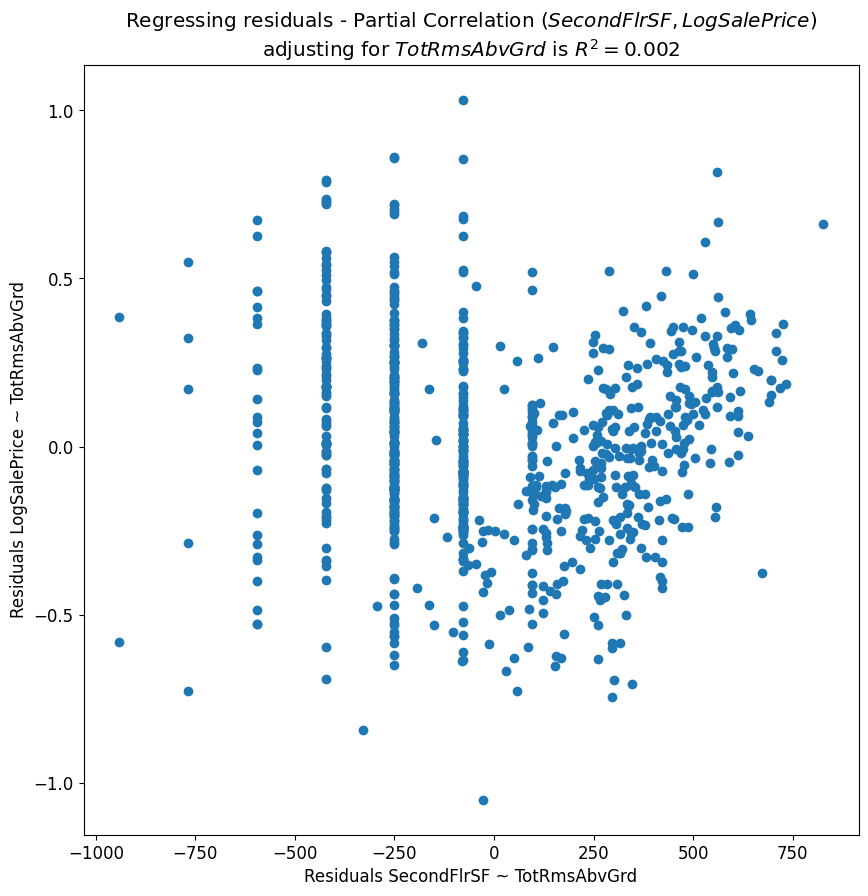

In [63]:
varX = 'SecondFlrSF'
varY = 'LogSalePrice'
varZ = 'TotRmsAbvGrd' # total rooms above ground level

model_SecondFlrSF_by_TotRmsAbvGrd = smf.ols(formula= f"{varX} ~ {varZ}", data=df).fit()
model_LogSalePrice_by_TotRmsAbvGrd = smf.ols(formula= f"{varY} ~ {varZ}", data=df).fit()

X = sm.add_constant(model_SecondFlrSF_by_TotRmsAbvGrd.resid)
y = model_LogSalePrice_by_TotRmsAbvGrd.resid
model_res = sm.OLS(y, X).fit()

plt.rcParams['figure.figsize'] =  [10, 10]
plt.rcParams.update({'font.size': 12})
plt.scatter(model_SecondFlrSF_by_TotRmsAbvGrd.resid, model_LogSalePrice_by_TotRmsAbvGrd.resid)
plt.xlabel(f'Residuals {varX} ~ {varZ}')
plt.ylabel(f'Residuals {varY} ~ {varZ}')
plt.title(f"Regressing residuals - Partial Correlation (${varX},{varY}$)\nadjusting for ${varZ}$ is $R^2 = {np.round(model_res.rsquared, 3)}$")
plt.show()

We use partial correlation by adjusting both `SecondFlrSF` and `LogSalePrice` to `TotRmsAbvGrd` looking for correlation of the resulted residuals. We so no clear correlation between the 2, so we assume that `SecondFlrSF` does not predict `LogSalePrice` well as a predicator, and most of their correlation is origined in the joint effect of `TotRmsAbvGrd`